# **Actividad 1: Agentes Inteligentes**

## **Alumno: Phabel Antonio López Delgado** [<phabel2001@gmail.com>]

### *Ejercicio 1:* Crear un agente inteligente básico en algún lenguaje de programación (e.g Python) que realice una tarea sencilla, como elegir una acción basada en su entorno. Por ejemplo, un agente que elige aleatoriamente entre moverse hacia una dirección u otra en un entorno bidimensional.

Solución: Se crea un agente inteligente que elige moverse aleatoriamente en un espacio euclideano en R^2. El agente lleva un registro del recorrido realizado, y evalua una función de costo dado un parámetro.

In [ ]:
# Importar librerias necesarias
import matplotlib.pyplot as plt
import random

In [ ]:
# Definir Agente Inteligente como una Clase
# Definimos el agente
class AgenteInteligente:

    # Constructor
    def __init__(self):
        # Posicion inicial en el origen
        self.posicion = (0, 0)
        # Recorrido empieza en el origen
        self.recorrido = [(0, 0)]
        # Inicializar atributo de desempeno
        self.desempeno = list()
        # Inicializar atributo de  distancia absoluta
        self.dist_abs = float()
        # Inicializar atributo de penalty para la distancia
        self.penalty = 1.25

    # Metodo para mover aleatoriamente en 4 direcciones
    def mover(self):
        # Definir las 4 direcciones posibles en el plano cartesiano / espacio euclideano en R^2
        movimientos = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        # Elegir movimiento aleatoriamente
        movimiento = random.choice(movimientos)
        # Actualizar nueva posicion
        self.posicion = (self.posicion[0] + movimiento[0], self.posicion[1] + movimiento[1])
        # Anadir nueva posicion al recorrido
        self.recorrido.append(self.posicion)
        # Regresar nueva posiciom
        return self.posicion

    # Metodo para mostrar todo el recorrido de todos los pasos realizados
    def recorrer(self):
        # Regresa recorrido
        return(self.recorrido)

    # Metodo para evaluar el desempeno de cada paso realizado
    def evaluar_pasos(self):
        # Calcular distancias euclideanas y su suma acumulada: distancia absoluta
        distancia = list()
        for step in range(1, len(self.recorrido)):
          # Notese que los pasos son siempre de tamano 1.0
          dist_euclid = ((self.recorrido[step][0]-self.recorrido[step-1][0])**2 + (self.recorrido[step][1]-self.recorrido[step-1][1])**2)**(1/2)
          distancia.append(dist_euclid)
        # Incluir atributo para medir el desempeno de cada paso
        self.desempeno = distancia
        # Regresar atributo desempeno
        return(self.desempeno)

    # Metodo para evaluar el costo acumulado por cada paso realizado, dado un penalty constante por paso.
    def evaluar_costo_acumulado(self):
        # Costo total acumulado incluyendo el penalty
        costo_total_acumulado = self.penalty * sum(self.desempeno)
        # Regresar costo total acumulado
        return(costo_total_acumulado)

    # Metodo para evaluar el costo desde el origen dado el penalty
    def evaluar_costo_desde_origen(self):
        # calcular el costo desde el origen dado el penalty
        self.dist_abs = self.penalty * ((self.recorrido[-1][0])**2 + (self.recorrido[-1][1])**2)**(1/2)
        # Regresar el costo desde el origen dado el penalty
        return(self.dist_abs)

    # Metodo para graficar trajectoria
    def graficar(self):
        # Obtener tamano de puntos
        tamanos = [20 * x for x in range(1, len(self.recorrido)+1)]
        # Graficar aumentando el tamano entre mas pasos se de
        plt.scatter(*zip(*self.recorrido), s=tamanos, alpha=0.5)
        plt.plot(*zip(*self.recorrido))
        plt.title("Trayecto evaluado por el Agente Inteligente")
        plt.show()

Iniciando el recorrido de 10 pasos desde el origen (0, 0)... 

Movimiento 1: Agente en posición (-1, 0)

Movimiento 2: Agente en posición (-1, -1)

Movimiento 3: Agente en posición (-2, -1)

Movimiento 4: Agente en posición (-2, 0)

Movimiento 5: Agente en posición (-2, 1)

Movimiento 6: Agente en posición (-2, 2)

Movimiento 7: Agente en posición (-1, 2)

Movimiento 8: Agente en posición (-1, 3)

Movimiento 9: Agente en posición (-1, 4)

Movimiento 10: Agente en posición (-2, 4)

Recorrido realizado: [(0, 0), (-1, 0), (-1, -1), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-1, 2), (-1, 3), (-1, 4), (-2, 4)]. 

Desempeno de cada paso: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]. 

Costo acumulado de los pasos realizados: 12.5. (Costo por paso o penalty: 1.25). 

Costo para regresar al origen: 5.5901699437494745. (Costo por el paso o penalty: 1.25). 

Gráfica del trayecto...



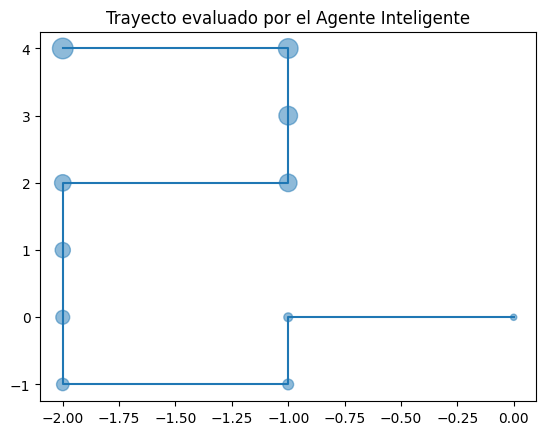

In [ ]:
# Instanciar el agente en un objeto
agente = AgenteInteligente()


# Establecer el numero de pasos
n = 10
print(f"Iniciando el recorrido de {n} pasos desde el origen (0, 0)... \n")
# Simular n movimientos
for i in range(n):
    print(f"Movimiento {i+1}: Agente en posición {agente.mover()}\n")


# Mostrar recorrido realizado
print(f"Recorrido realizado: {agente.recorrer()}. \n")


# Mostrar desempeno de cada paso
print(f"Desempeno de cada paso: {agente.evaluar_pasos()}. \n")


# Mostrar el costo acumulado por cada paso realizado, dado un penalty constante por paso.
print(f"Costo acumulado de los pasos realizados: {agente.evaluar_costo_acumulado()}. (Costo por paso o penalty: {agente.penalty}). \n")


# Mostrar el costo desde el origen y hasta el punto final de la trajectoria para evaluar un regreso final directo al origen, dado un penalty.
print(f"Costo para regresar al origen: {agente.evaluar_costo_desde_origen()}. (Costo por el paso o penalty: {agente.penalty}). \n")


# Graficar
print("Gráfica del trayecto...\n")
agente.graficar()


### *Ejercicio 2:* Crear un sistema sencillo que recomiende productos basándose en la similitud de preferencias de otros usuarios. Usaremos la técnica de filtrado colaborativo basado en usuarios.

Solución: Se utilza la similitud pareada entre cada entrada de una matriz para obtener la afinidad entre los productos y sus usuarios. Posteriormente se ordenan las similitudes de mayor a menor para ver qué producto es más afin a un usuario dado.

In [ ]:
# Importar librerias necesarias
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
import itertools

In [ ]:
# Definir el Agente Inteligente de Recomendacion como una Clase
class AgenteRecomendacion:

    # Constructor
    def __init__(self, matriz_calificaciones = None):
        # Atributo de matriz de calificaciones (usuarios x productos)
        # -- Filas: Usuarios | Columnas: Productos
        self.matriz_calificaciones = matriz_calificaciones
        # Atributo de metrica para obtener similitudes
        self.metrica = str()
        # Atributo para matriz de similitudes pareadas
        self.similitudes = list()
        # Atributo para diccionario de recomendaciones pareadas para usuarios
        self.recomendaciones_dict = dict()
        # Atributo para usuario objetivo
        self.usuario_objetivo = list()
        # Atributo con metricas posibles
        self.metricas_posibles = {"cosine", "euclidean", "l1", "l2", "manhattan"}

    # Metodo para elegir metrica para obtener similitudes
    def elegir_metrica(self):
        # Pedir metrica al usuario
        metrica = None
        while metrica not in self.metricas_posibles:
          metrica = input("Elija metrica de similitud valida (cosine, manhattan/l1, euclidean/l2) para similitdes pareadas: ")
        # Asignar atributo metrica
        self.metrica = metrica

    # Funcion para obtener matriz de similitudes pareadas dada la metrica de similitud
    # y dar recomendaciones pareadas
    def computar_similitudes(self):
        # Elegir metrica
        if self.metrica not in self.metricas_posibles:
          self.elegir_metrica()
        # Obtener matriz de similitudes pareadas dada la metrica elegida por el usuario
        self.similitudes = pairwise_distances(self.matriz_calificaciones, metric=self.metrica)
        # Definir diccionario de recomendaciones entre usuarios
        usuarios = range(0, len(self.matriz_calificaciones))
        # Obtener mejores recomendaciones por usuario
        recomendaciones = [self.similitudes[usuario].argsort() for usuario in usuarios]
        self.recomendaciones_dict = {usuario: recomendacion for usuario, recomendacion in zip(usuarios, recomendaciones)}
        # Mostrar matriz de similitudes pareadas
        print(f"Matriz de similitudes pareadas con metrica={self.metrica}: {self.similitudes} \n")
        # Regresar diccionario de recomendaciones
        return(self.recomendaciones_dict)

    # Metodo para obtener las recomendaciones para un usuario objetivo dada una metrica elegida por el usuario
    def recomendacion_usuario_objetivo(self, usuario_objetivo = list()):
        # Obtener usuario objetivo
        self.usuario_objetivo = usuario_objetivo
        # Elegir metrica
        if self.metrica not in self.metricas_posibles:
          self.elegir_metrica()
        # Obtener similitudes para el usuario
        usuarios = range(0, len(self.matriz_calificaciones))
        recomendaciones = [pairwise_distances(np.array(self.matriz_calificaciones[usuario]).reshape(1, -1), np.array(self.usuario_objetivo).reshape(1, -1), metric=self.metrica) for usuario in usuarios]
        recomendaciones = np.concatenate(recomendaciones).flatten()
        # Obtener recomendaciones para usuario objetivo
        self.recomendacion_usuario_objetivo = recomendaciones.argsort()
        print(f"Similitudes para el usuario objetivo: {recomendaciones}")
        # Regresar recomendacion para el usuario objetivo
        return(self.recomendacion_usuario_objetivo)


In [ ]:
# Evaluar el Agente Inteligente de Recomendacion
# Matriz de calificaciones (usuarios x productos)
# Filas: Usuarios, Columnas: Productos
calificaciones = np.array([
    [5, 4, 0, 1],
    [4, 0, 4, 1],
    [1, 1, 0, 5],
    [0, 0, 5, 4]
])


# Instanciar el agente en un objeto
agente = AgenteRecomendacion(calificaciones)

# Dar recomendaciones pareadas
print(f"Recomendaciones por usuario: [recomendaciones] (metrica={agente.metrica}): {agente.computar_similitudes()}")

# Dar recomendacion para usuario objetivo 1
usuario_objetivo = [4, 0, 4, 2]
print(f"Recomendacion para usuario objetivo (metrica={agente.metrica}) {usuario_objetivo}: {agente.recomendacion_usuario_objetivo(usuario_objetivo)}")

Elija metrica de similitud valida (cosine, manhattan/l1, euclidean/l2) para similitdes pareadas: coseno
Elija metrica de similitud valida (cosine, manhattan/l1, euclidean/l2) para similitdes pareadas: cosine
Matriz de similitudes pareadas con metrica=cosine: [[0.         0.43592393 0.58426029 0.90360746]
 [0.43592393 0.         0.69848866 0.3475273 ]
 [0.58426029 0.69848866 0.         0.39888691]
 [0.90360746 0.3475273  0.39888691 0.        ]] 

Recomendaciones por usuario: [recomendaciones] (metrica=): {0: array([0, 1, 2, 3]), 1: array([1, 3, 0, 2]), 2: array([2, 3, 0, 1]), 3: array([3, 1, 2, 0])}
Similitudes para el usuario objetivo: [0.43422105 0.01355995 0.55094979 0.27118911]
Recomendacion para usuario objetivo (metrica=cosine) [4, 0, 4, 2]: [1 3 0 2]


### *Ejercicio 3:* Crear un sistema donde el agente compare los precios de productos de diferentes categorías y seleccione el más barato, dado un conjunto de productos con características.

Solución: Utilizar diccionarios para accesar a las variables de interés.

In [ ]:
# Definir el Agente Inteligente de Recomendacion como una Clase
class AgenteComparacion:

    # Constructor
    def __init__(self, productos_dict = dict()):
        # Atributo de diccionario con productos
        self.productos_dict = productos_dict

    # Funcion para recomendar el producto dada la minimizacion de una categoria
    def recomendar_producto(self, categoria = str()):
        # Obtener producto recomendado
        producto_recomendado = min(self.productos_dict, key=lambda x: x[categoria])
        return(producto_recomendado)


In [ ]:
# Evaluar el Agente Inteligente de Comparacion

# Productos con precios y características
productos = [
    {"nombre": "Producto A", "precio": 100, "caracteristicas": ["rojo", "plástico"], "tamano": 20, "peso": 15, "tiempo": 2},
    {"nombre": "Producto B", "precio": 80, "caracteristicas": ["rojo", "metal"], "tamano": 10, "peso": 25, "tiempo": 3},
    {"nombre": "Producto C", "precio": 120, "caracteristicas": ["azul", "plástico"], "tamano": 5, "peso": 5, "tiempo": 7}
]

# Instanciar el agente en un objeto
agente = AgenteComparacion(productos)

# Obtener recomendacion con base en precio
categoria = "precio"
producto = agente.recomendar_producto(categoria)
print(f"Producto recomendado por {categoria}: {producto['nombre']} con {categoria}: {producto[categoria]}")

# Obtener recomendacion con base en tamano
categoria = "tamano"
producto = agente.recomendar_producto(categoria)
print(f"Producto recomendado por {categoria}: {producto['nombre']} con {categoria}: {producto[categoria]}")

# Obtener recomendacion con base en peso
categoria = "peso"
producto = agente.recomendar_producto(categoria)
print(f"Producto recomendado por {categoria}: {producto['nombre']} con {categoria}: {producto[categoria]}")

# Obtener recomendacion con base en tiempo
categoria = "tiempo"
producto = agente.recomendar_producto(categoria)
print(f"Producto recomendado por {categoria}: {producto['nombre']} con {categoria}: {producto[categoria]}")

Producto recomendado por precio: Producto B con precio: 80
Producto recomendado por tamano: Producto C con tamano: 5
Producto recomendado por peso: Producto C con peso: 5
Producto recomendado por tiempo: Producto A con tiempo: 2


### *Ejercicio 4:* Crear un agente observador que registre los eventos de cambio de un entorno a lo largo del tiempo (por ejemplo, observar las acciones de los usuarios en una plataforma).

Solución: Registrar los eventos ocurridos en una lista por practicidad. Incluso se puede usar para buscar cuándo sucedieron ciertos eventos.

In [ ]:
# Definir el Agente Inteligente Observador como una Clase
class AgenteObservador:

    # Constructor
    def __init__(self):
      # Atributo de lista de eventos
      self.eventos = list()

    # Metodo para observar cierto evento
    def observar_evento(self, evento):
      #  Atributo para incluir cierto evento
      self.eventos.append(evento)

    # Metodo para mostrar todos los eventos
    def mostrar_eventos(self):
      for i, evento in enumerate(self.eventos, 1):
        print(f"Evento {i}: {evento}")

    # Fucion para buscar ciertos eventos
    def buscar_evento(self, evento_buscado):
      indices = [i for i, evento in enumerate(self.eventos) if evento == evento_buscado]
      return(indices)

In [ ]:
# Evaluar el Agente Inteligente Observador
# Crear eventos a registrar
eventos = [
    "Usuario A ha iniciado sesión",
    "Usuario B ha comprado un producto",
    "Usuario A ha cerrado sesión",
    "Usuario A ha iniciado sesión",
    "Usuario A ha cerrado sesión"
]

# Instanciar el agente en un objeto
agente = AgenteObservador()

# Observar eventos
for evento in eventos:
  agente.observar_evento(evento)

# Mostrar eventos registrados
print(f"Eventos registrados: {agente.eventos}\n")

# Buscar cierto evento
evento_buscar = "Usuario A ha cerrado sesión"
print(f"Se encontro el evento {evento_buscar}, como evento(s): {agente.buscar_evento(evento_buscar)}.")

Eventos registrados: ['Usuario A ha iniciado sesión', 'Usuario B ha comprado un producto', 'Usuario A ha cerrado sesión', 'Usuario A ha iniciado sesión', 'Usuario A ha cerrado sesión']

Se encontro el evento Usuario A ha cerrado sesión, como evento(s): [2, 4].


### Otros ejemplos de clase

In [ ]:
#Actividad 4: Agentes Notificadores
#
#Objetivo: Crear un agente que notifique eventos basados en condiciones.
#
#Descripción de la actividad: Simular un sistema de notificación de eventos que avise cuando un valor supera un umbral determinado #(por ejemplo, notificar si la temperatura de una ciudad supera cierto nivel).
#
#Código de ejemplo:

import random
import time

# Agente notificando eventos
def notificador_umbral(temperatura_umbral):
    while True:
        temperatura = random.randint(0, 40)  # Temperatura aleatoria
        print(f"Temperatura actual: {temperatura}°C")
        if temperatura > temperatura_umbral:
            print(f"¡Alerta! La temperatura ha superado el umbral de {temperatura_umbral}°C")
        time.sleep(2)  # Esperar 2 segundos antes de revisar de nuevo

# Ejecutar el notificador con umbral de 30°C
notificador_umbral(30)

In [ ]:
#Actividad 6: Agentes de Negociación

#Objetivo: Simular un agente de negociación que pueda llegar a un acuerdo en un escenario simple.

#Descripción de la actividad: Crear un agente de negociación que simule un proceso donde dos agentes
#intenten negociar un precio o recurso, eligiendo el valor intermedio más cercano.

#Código de ejemplo:

def negociar(precio_agente1, precio_agente2):
    return (precio_agente1 + precio_agente2) / 2

# Precios de los agentes
precio_agente1 = 50
precio_agente2 = 60

# Resultado de la negociación
precio_acordado = negociar(precio_agente1, precio_agente2)
print(f"Precio negociado: {precio_acordado}")

Precio negociado: 55.0
